In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import sys
import imodels
import pmlb
import imodelsx.process_results
from collections import defaultdict
sys.path.append('../experiments/')
results_dir = '../results/multitask_gam_mar12/'

r = imodelsx.process_results.get_results_df(results_dir)
experiment_filename = '../experiments/03_multitask_gam.py'
d = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename)
d = imodelsx.process_results.average_over_seeds(
    d, experiment_filename, key_to_average_over='seed'
)
d = d[~d.dataset_name.str.contains('_fri_')]


# checking
cols_varied = imodelsx.process_results.get_experiment_keys(
    d, experiment_filename)
print('experiment varied these params:', cols_varied)
if not 'roc_auc_test' in d:
    d['roc_auc_test'] = np.nan
BEST_PARAMS = {
    'linear_penalty': 'ridge',
    'n_boosting_rounds': 0,
    'interactions': 0.95,
    'use_onehot_prior': 0,
    'use_input_normalization': 1,
    'use_internal_classifiers': 0,
    'use_normalize_feature_targets': 0,
    'train_frac': 0.8,
    'use_fit_target_curves': 1,
    'max_rounds': 5000,
    'boosting_strategy': 'adaboost',
}
for col in cols_varied:
    assert col in ['dataset_name', 'use_multitask'] or col in BEST_PARAMS, col + 'must be in BEST_PARAMS!'

print('num_datasets run in different groups',)
display(d.groupby([x for x in cols_varied if not x == 'dataset_name']).size())

# imodelsx.process_results.delete_runs_in_dataframe(r[r.use_normalize_feature_targets], actually_delete=True)
# r.to_pickle('../results/agg.pkl')
# imodelsx.process_results.delete_runs_in_dataframe(r[(r.use_multitask == 0) * (r.linear_penalty != 'ridge')], actually_delete=True)
# imodelsx.process_results.get_experiment_keys(r, experiment_filename)

[2024-03-18 08:24:58,438] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/pkg_resources/__init__.py:2350: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_bui

experiment varied these params: ['dataset_name', 'use_multitask', 'interactions', 'n_boosting_rounds', 'boosting_strategy', 'max_rounds']
num_datasets run in different groups


use_multitask  interactions  n_boosting_rounds  boosting_strategy  max_rounds
0              0.00          0                  adaboost           5000          68
                             8                  bagging            5000          68
               0.95          0                  adaboost           5000          68
                             8                  bagging            5000          68
1              0.00          0                  adaboost           5000          68
                             2                  residual           100           68
                             4                  residual           100           68
                             8                  bagging            50            68
                                                                   100           68
                                                                   5000          67
                                                residual           50            6

### Compare baseline to best setting

,setting,n_datasets,frac_improved,median_change,median_multitask,avg_change,avg_multitask
0,All,68,0.485,-0.000,0.761,-0.019,0.681
1,>=100 samples,54,0.500,-0.000,0.779,-0.009,0.711
2,>=1000 samples,28,0.679,0.000,0.761,-0.001,0.716
3,>=10000 samples,17,0.706,0.002,0.618,0.003,0.661
4,>=10 features,30,0.667,0.000,0.857,0.000,0.773
5,>=25 features,5,0.800,0.001,0.860,0.004,0.872
6,Well predicted,52,0.538,0.000,0.815,-0.007,0.808
7,PMLB,60,0.450,-0.002,0.738,-0.021,0.669


top dsets


use_multitask,dataset_name,standard,multitask,num_features,num_samples,feature_over_samples,improvement
48,659_sleuth_ex1714,0.39,0.48,7.0,37.0,0.19,0.09
38,542_pollution,0.16,0.21,15.0,48.0,0.31,0.05
63,friedman1,0.84,0.89,10.0,160.0,0.06,0.05
40,556_analcatdata_apnea2,0.79,0.84,3.0,380.0,0.01,0.04
4,1089_USCrime,0.76,0.79,13.0,37.0,0.35,0.03
12,1595_poker,0.34,0.37,10.0,820008.0,0.00,0.03
23,228_elusage,0.78,0.81,2.0,44.0,0.05,0.03
31,505_tecator,0.97,1.00,124.0,192.0,0.65,0.03
25,230_machine_cpu,0.90,0.91,6.0,167.0,0.04,0.01
65,friedman3,0.98,0.99,4.0,160.0,0.02,0.01


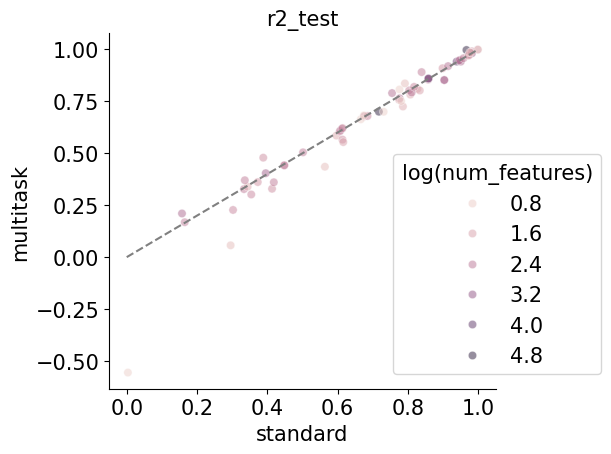

In [2]:
# filter datasets for which there is a row with use_multitask=0 and use_multitask=1 (done running)
def evaluate(d, metric='r2_test'):
    d2 = d.groupby(['dataset_name'])
    d2 = d2.filter(lambda x: len(x) == 2)

    # pivot table for d2 based on dataset_name, use_multitask, and r2_test
    metric_table = d2.pivot_table(index=['dataset_name'], columns=[
        'use_multitask'], values=metric)

    # add num_features based on dataset_name
    n_features = d2.groupby(['dataset_name']).first().n_features
    n_samples = d2.groupby(['dataset_name']).first().n_samples

    # add some metadata filters
    metric_table['num_features'] = n_features
    metric_table['num_samples'] = n_samples
    metric_table['feature_over_samples'] = metric_table['num_features'].astype(
        int) / metric_table['num_samples'].astype(int)
    metric_table = metric_table.rename(
        columns={0: 'standard', 1: 'multitask'}).reset_index()

    # table of breakdowns
    breakdown_idxs = {
        'All': metric_table['standard'] > -100,
        '>=100 samples': metric_table['num_samples'] >= 100,
        '>=1000 samples': metric_table['num_samples'] >= 1000,
        '>=10000 samples': metric_table['num_samples'] >= 10000,
        '>=10 features': metric_table['num_features'] >= 10,
        '>=25 features': metric_table['num_features'] >= 25,
        'Well predicted': metric_table['standard'] > 0.5,
        'Multi-output': metric_table['dataset_name'].str.endswith('_multitask'),
        'PMLB': metric_table['dataset_name'].isin(pmlb.dataset_names),
        'Fri': metric_table['dataset_name'].str.contains('_fri_'),
    }

    metric_table['improvement'] = metric_table['multitask'] - \
        metric_table['standard']
    summ = defaultdict(list)
    for setting, idxs in breakdown_idxs.items():
        if idxs.sum() > 0:
            summ['setting'].append(setting)
            summ['n_datasets'].append(idxs.sum())
            summ['frac_improved'].append(
                (metric_table['improvement'][idxs] > 0).mean())
            summ['median_change'].append(
                metric_table['improvement'][idxs].median())
            summ['median_multitask'].append(
                metric_table['multitask'][idxs].median())
            summ['avg_change'].append(
                metric_table['improvement'][idxs].mean())
            summ['avg_multitask'].append(
                metric_table['multitask'][idxs].mean())
            # summ['avg_standard'].append(metric_table['standard'][idxs].mean())

    # multioutput
    display(pd.DataFrame(summ).round(3))
    print('top dsets')
    display(metric_table.sort_values(
        'improvement', ascending=False).head(30).round(2))
    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # display(r2_table.sort_values('improvement', ascending=False).round(2))

    # make plot
    plt.plot([0, 1], [0, 1], '--', color='gray')
    # hue on log scale
    metric_table['num_features_log'] = np.log(metric_table['num_features'])
    sns.scatterplot(data=metric_table, x='standard',
                    y='multitask', hue='num_features_log', alpha=0.5)
    plt.legend(loc='center right', bbox_to_anchor=(
        1.3, 0.35), title='log(num_features)')
    plt.title(metric, fontsize='medium')
    # plt.xlim([0.5, 1.05])
    # plt.ylim([0.5, 1.05])
    plt.savefig(f'../figs/{metric}.pdf', bbox_inches='tight')
    plt.show()


# df = d
df = d[(d[list(BEST_PARAMS)] == pd.Series(BEST_PARAMS)).all(axis=1)]

# df = df[df.train_frac == 0.25]
df = df[~df.dataset_name.str.contains('_fri_')]
regr = df[df['r2_test'].notna()]
clas = df[df['roc_auc_test'].notna()]
if len(regr) > 0:
    evaluate(regr, metric='r2_test')
if len(clas) > 0:
    evaluate(clas, metric='roc_auc_test')

### Compare different settings

In [5]:
cols_varied = imodelsx.process_results.get_experiment_keys(
    d, experiment_filename)
# d = d[(d.use_internal_classifiers == 0) * (d.use_onehot_prior == 0)]
cols_varied_d_ = [x for x in cols_varied if not x == 'dataset_name']
groups = d.groupby(cols_varied_d_)

dset_names = [set(d.loc[g]['dataset_name'].values)
              for g in groups.groups.values()]
dset_names_shared = list(set.intersection(*dset_names))
print('Num datasets run in each setting:')
display(groups.size())
dc = d[d.dataset_name.isin(dset_names_shared)]
print(len(dset_names_shared), 'completed shared datasets')


if len(dset_names_shared) > 0:
    # compute stats per group
    baseline_group_idx = 0
    groups = dc.groupby(cols_varied_d_)
    group_idxs = list(groups.groups.values())
    baseline_group = dc.loc[group_idxs[baseline_group_idx].values].sort_values(
        by='dataset_name')
    stat_cols = defaultdict(list)
    for group in groups.groups.values():
        g = dc.loc[group].sort_values(by='dataset_name')
        stat_cols['win_rate'].append(
            (g['r2_test'].values >
             baseline_group['r2_test'].values).mean())
        stat_cols['r2_test__>=15_features'] = g[g['n_features']
                                                >= 15]['r2_test'].mean()
        for k in ['r2_test', 'r2_train']:
            stat_cols[k].append(g[k].mean())
            stat_cols[f'{k}_median'].append(g[k].median())
    stat_cols = pd.DataFrame(stat_cols)

    # save with index
    stats = groups['r2_test'].mean().reset_index()
    for col in stat_cols.columns:
        stats[col] = stat_cols[col].values
    stats.loc[baseline_group_idx, 'win_rate'] = np.nan

    # color last 2 columns by value
    display(
        stats
        .style
        .background_gradient(
            cmap='viridis', subset=['r2_test', 'r2_test_median', 'win_rate', 'r2_test__>=15_features', 'r2_train']
        )
        .format(precision=3)
    )

Num datasets run in each setting:


use_multitask  interactions  n_boosting_rounds  boosting_strategy  max_rounds
0              0.00          0                  adaboost           5000          68
                             8                  bagging            5000          68
               0.95          0                  adaboost           5000          68
                             8                  bagging            5000          68
1              0.00          0                  adaboost           5000          68
                             2                  residual           100           68
                             4                  residual           100           68
                             8                  bagging            50            68
                                                                   100           68
                                                                   5000          67
                                                residual           50            6

63 completed shared datasets


,use_multitask,interactions,n_boosting_rounds,boosting_strategy,max_rounds,r2_test,win_rate,r2_test__>=15_features,r2_test_median,r2_train,r2_train_median
0,0,0.000,0,adaboost,5000,0.636,nan,0.831,0.739,0.742,0.798
1,0,0.000,8,bagging,5000,0.635,0.413,0.831,0.733,0.761,0.817
2,0,0.950,0,adaboost,5000,0.709,0.889,0.831,0.781,0.825,0.918
3,0,0.950,8,bagging,5000,0.696,0.714,0.831,0.783,0.838,0.895
4,1,0.000,0,adaboost,5000,0.612,0.349,0.831,0.734,0.775,0.843
5,1,0.000,2,residual,100,0.629,0.413,0.831,0.727,0.743,0.797
6,1,0.000,4,residual,100,0.630,0.429,0.831,0.731,0.743,0.797
7,1,0.000,8,bagging,50,0.628,0.365,0.831,0.707,0.732,0.794
8,1,0.000,8,bagging,100,0.613,0.460,0.831,0.713,0.738,0.797
9,1,0.000,8,bagging,5000,0.610,0.317,0.831,0.727,0.786,0.858


### Train frac plot

In [ ]:
plt.figure(figsize=(12, 3))
for i, met in enumerate(['r2_test', 'r2_test_median', 'win_rate']):
    plt.subplot(1, 3, i + 1)
    tab = stats.pivot_table(index=['train_frac'], columns=[
        'use_multitask'], values=met)
    plt.plot(tab, 'o-', label=[{0: 'Single-task',
             1: 'Multi-task'}[x] for x in tab.columns])
    plt.ylabel(met)
    plt.xlabel('Fraction of data used for training')
plt.legend()
plt.show()